In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer


In [5]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [6]:
df.corr()['price']

price                    1.000000
bedrooms                 0.305216
bathrooms                0.449451
sqft_living              0.621417
sqft_lot                 0.092917
floors                   0.281286
waterfront                    NaN
view                     0.196068
condition                0.047187
grade                    0.633678
zipcode                 -0.039173
Age_of_House            -0.043720
Years_last_renovation   -0.078572
basement                 0.150544
biggerliving             0.211362
biggerlot                0.021882
distance_from_a_city    -0.483953
distance_from_airport    0.297453
Name: price, dtype: float64

In [7]:
df.shape

(17206, 19)

In [8]:
df = df.loc[df['sqft_lot']<45000.00]

In [222]:
df = df.loc[(df['grade']>7)]

In [223]:
df = df.loc[(df['grade']==7)|(df['grade']==8)]

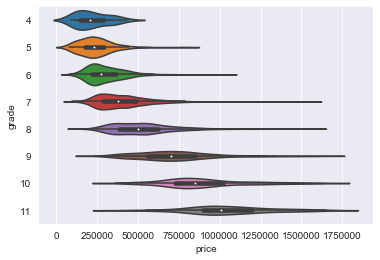

In [230]:
sns.violinplot(x='price', y='grade', data=df, orient='h')
plt.show()

In [225]:
df.shape

(4859, 19)

In [90]:
df['grade9'] = df.grade.apply(lambda x: 1 if x ==9 else 0)
df['grade8'] = df.grade.apply(lambda x: 1 if x ==8 else 0)
df['grade10'] = df.grade.apply(lambda x: 1 if x ==10 else 0)
df['grade11'] = df.grade.apply(lambda x: 1 if x ==11 else 0)


In [91]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport', 'grade9',
       'grade8', 'grade10', 'grade11'],
      dtype='object')

In [92]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport,grade9,grade8,grade10,grade11
3,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,33,0,0,1,11.683886,27.230991,0,1,0,0
20,2014-07-03,285000.0,5,2.50,2270,6300,2.0,0.0,0.0,3,...,25,0,1,0,31.624508,16.386274,0,1,0,0
21,2014-11-20,329000.0,3,2.25,2450,6500,2.0,0.0,0.0,4,...,35,0,1,0,26.366708,12.449169,0,1,0,0
23,2014-06-26,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,3,...,105,1,1,0,3.874600,22.112819,0,1,0,0
24,2014-12-01,667000.0,3,1.00,1400,1581,1.5,0.0,0.0,5,...,111,0,0,0,2.228173,19.863426,0,1,0,0


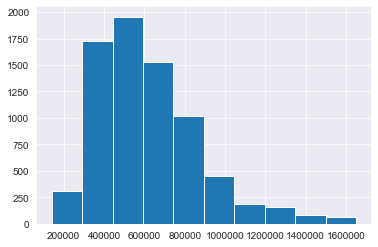

In [93]:
df['price'].hist()

In [94]:
features =  ['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

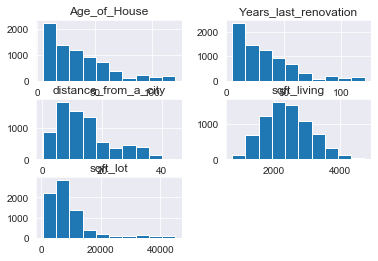

In [95]:
df[features].hist();

In [49]:
tobox = ['distance_from_a_city','sqft_lot','sqft_living',]

In [96]:
for feat in features:
    df[feat],b = scs.boxcox(df[feat])


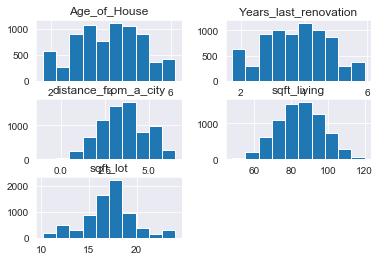

In [97]:
df[features].hist();

In [98]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [99]:
df['bedbath'] = df['bedrooms']*df['bathrooms']

In [100]:
df['livinglot'] = df['sqft_living']*df['sqft_lot']

In [101]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation','bedbath','livinglot']


In [102]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [103]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [104]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport', 'grade9',
       'grade8', 'grade10', 'grade11', 'bedbath', 'livinglot'],
      dtype='object')

In [105]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'Age_of_House','basement','bedbath','grade']
# outcome = ['price']

In [166]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
           'Years_last_renovation','bedbath','grade8', 'grade9', 'grade10', 'grade11',]
outcome = ['price']

In [167]:
train, test = train_test_split(df)


In [168]:
print(len(train), len(test))
train.head()

5307 1769


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,biggerliving,biggerlot,distance_from_a_city,distance_from_airport,grade9,grade8,grade10,grade11,bedbath,livinglot
5025,2014-12-16,998000.0,0.541813,-0.399911,0.754136,0.466591,2.0,0.0,0.0,3,...,1,1,-0.601037,15.879033,1,0,0,0,0.015965,0.712839
1453,2014-10-29,810000.0,1.812682,1.969722,1.540405,0.387805,2.0,0.0,0.0,3,...,1,0,-0.535757,11.907127,1,0,0,0,2.669915,1.143068
2761,2015-04-16,750000.0,0.541813,-0.399911,0.089091,0.583435,1.0,0.0,2.0,4,...,1,1,0.077000,7.520892,0,1,0,0,0.015965,0.371569
1542,2014-11-07,785000.0,-0.729056,0.074015,0.779994,2.204159,2.0,0.0,2.0,3,...,0,0,0.013069,15.791403,1,0,0,0,-0.452379,1.915925
4513,2014-06-23,479000.0,-0.729056,-0.399911,-0.368480,0.607307,2.0,0.0,0.0,4,...,1,0,0.460606,36.292897,0,1,0,0,-0.686551,0.095904


In [169]:
df[x_cols].corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,distance_from_a_city,Years_last_renovation,bedbath,grade8,grade9,grade10,grade11
bedrooms,1.000000,0.357976,0.581413,0.324666,0.124818,0.053847,0.823536,-0.177353,0.133945,0.080127,0.050330
bathrooms,0.357976,1.000000,0.503430,0.030759,0.100518,-0.382035,0.805662,-0.303813,0.187811,0.202832,0.094316
sqft_living,0.581413,0.503430,1.000000,0.499138,0.194577,-0.039888,0.651775,-0.503011,0.308935,0.336191,0.164129
sqft_lot,0.324666,0.030759,0.499138,1.000000,0.323586,0.380932,0.209719,-0.203791,0.091438,0.181339,0.094594
distance_from_a_city,0.124818,0.100518,0.194577,0.323586,1.000000,-0.165918,0.129875,0.004401,-0.005081,-0.003917,0.011781
Years_last_renovation,0.053847,-0.382035,-0.039888,0.380932,-0.165918,1.000000,-0.199601,0.197651,-0.176317,-0.059802,-0.015468
bedbath,0.823536,0.805662,0.651775,0.209719,0.129875,-0.199601,1.000000,-0.287519,0.189727,0.171683,0.090691
grade8,-0.177353,-0.303813,-0.503011,-0.203791,0.004401,0.197651,-0.287519,1.000000,-0.815627,-0.405423,-0.140411
grade9,0.133945,0.187811,0.308935,0.091438,-0.005081,-0.176317,0.189727,-0.815627,1.000000,-0.157914,-0.054691
grade10,0.080127,0.202832,0.336191,0.181339,-0.003917,-0.059802,0.171683,-0.405423,-0.157914,1.000000,-0.027185


In [170]:
X = train[x_cols]
y = train['price']

In [171]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1106.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:33:03   Log-Likelihood:                -69290.
No. Observations:                5307   AIC:                         1.386e+05
Df Residuals:                    5296   BIC:                         1.387e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -2.473e+04   6737.590     -3.670      0.000   -3.79e+04   -1.15e+04
bathrooms             -1.439e+04   6541.397     -2.200      0.028   -2.72e+04   -1570.314
sqft_living            9.748e+04   2731.362     35.687      0.000    9.21e+04    1.03e+05
sqft_lot               1.416e+04   2214.280      6.396      0.000    9820.545    1.85e+04
distance_from_a_city   -1.28e+05   1823.068    -70.191      0.000   -1.32e+05   -1.24e+05
Years_last_renovation  3526.1041   2068.515      1.705      0.088    -529.038    7581.246
bedbath                2.627e+04   1.08e+04      2.437      0.015    5134.193    4.74e+04
grade8                 5.638e+05   2102.820    268.129      0.000     5.6e+05    5.68e+05
grade9                 6.405e+05   3348.472    191.287      0.000    6.34e+05    6.47e+05
grade10                6.825e+05   6294.003    108.441      0.000     6.7e+05    6.95e+05
grade11                7.609e+05   1.63e+04     46.806      0.000    7.29e+05    7.93e+05
==============================================================================
Omnibus:                      107.772   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.078
Skew:                           0.194   Prob(JB):                     2.61e-38
Kurtosis:                       3.795   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

11 10
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-2.473e+04,6737.590,-3.670,0.000,-3.79e+04,-1.15e+04
bathrooms,-1.439e+04,6541.397,-2.200,0.028,-2.72e+04,-1570.314
sqft_living,9.748e+04,2731.362,35.687,0.000,9.21e+04,1.03e+05
sqft_lot,1.416e+04,2214.280,6.396,0.000,9820.545,1.85e+04
distance_from_a_city,-1.28e+05,1823.068,-70.191,0.000,-1.32e+05,-1.24e+05


In [173]:
X = train[x_cols]
y= train['price']

In [174]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     1228.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:33:05   Log-Likelihood:                -69292.
No. Observations:                5307   AIC:                         1.386e+05
Df Residuals:                    5297   BIC:                         1.387e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -2.381e+04   6717.521     -3.545      0.000    -3.7e+04   -1.06e+04
bathrooms            -1.492e+04   6535.213     -2.283      0.022   -2.77e+04   -2111.223
sqft_living           9.741e+04   2731.564     35.660      0.000    9.21e+04    1.03e+05
sqft_lot              1.593e+04   1957.142      8.138      0.000    1.21e+04    1.98e+04
distance_from_a_city -1.291e+05   1701.695    -75.853      0.000   -1.32e+05   -1.26e+05
bedbath                2.52e+04   1.08e+04      2.340      0.019    4089.463    4.63e+04
grade8                5.643e+05   2084.212    270.754      0.000     5.6e+05    5.68e+05
grade9                6.395e+05   3294.425    194.113      0.000    6.33e+05    6.46e+05
grade10               6.815e+05   6264.268    108.787      0.000    6.69e+05    6.94e+05
grade11                 7.6e+05   1.63e+04     46.766      0.000    7.28e+05    7.92e+05
==============================================================================
Omnibus:                      112.810   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.599
Skew:                           0.198   Prob(JB):                     1.35e-40
Kurtosis:                       3.820   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = train[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 18.55223178134968),
 ('bathrooms', 16.643310918764673),
 ('sqft_living', 2.9488700976511777),
 ('sqft_lot', 1.611749319567428),
 ('distance_from_a_city', 1.1381619356387613),
 ('bedbath', 44.60139199430446),
 ('grade8', 1.2052392126054228),
 ('grade9', 1.0979967063690308),
 ('grade10', 1.1809081749093744),
 ('grade11', 1.0472479326314186)]

In [176]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5.5]
print(len(vif_scores), len(x_cols))

10 7


In [177]:
X = train[x_cols]
y= train['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1830.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:33:09   Log-Likelihood:                -69305.
No. Observations:                5307   AIC:                         1.386e+05
Df Residuals:                    5300   BIC:                         1.387e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sqft_living           9.133e+04   2139.059     42.695      0.000    8.71e+04    9.55e+04
sqft_lot              1.544e+04   1852.298      8.336      0.000    1.18e+04    1.91e+04
distance_from_a_city -1.291e+05   1698.390    -75.995      0.000   -1.32e+05   -1.26e+05
grade8                5.631e+05   2068.594    272.215      0.000    5.59e+05    5.67e+05
grade9                6.403e+05   3289.424    194.662      0.000    6.34e+05    6.47e+05
grade10               6.863e+05   6173.383    111.165      0.000    6.74e+05    6.98e+05
grade11               7.668e+05   1.62e+04     47.296      0.000    7.35e+05    7.99e+05
==============================================================================
Omnibus:                      117.065   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.741
Skew:                           0.213   Prob(JB):                     2.82e-41
Kurtosis:                       3.814   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1830.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:33:13   Log-Likelihood:                -69305.
No. Observations:                5307   AIC:                         1.386e+05
Df Residuals:                    5300   BIC:                         1.387e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sqft_living           9.133e+04   2139.059     42.695      0.000    8.71e+04    9.55e+04
sqft_lot              1.544e+04   1852.298      8.336      0.000    1.18e+04    1.91e+04
distance_from_a_city -1.291e+05   1698.390    -75.995      0.000   -1.32e+05   -1.26e+05
grade8                5.631e+05   2068.594    272.215      0.000    5.59e+05    5.67e+05
grade9                6.403e+05   3289.424    194.662      0.000    6.34e+05    6.47e+05
grade10               6.863e+05   6173.383    111.165      0.000    6.74e+05    6.98e+05
grade11               7.668e+05   1.62e+04     47.296      0.000    7.35e+05    7.99e+05
==============================================================================
Omnibus:                      117.065   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.741
Skew:                           0.213   Prob(JB):                     2.82e-41
Kurtosis:                       3.814   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

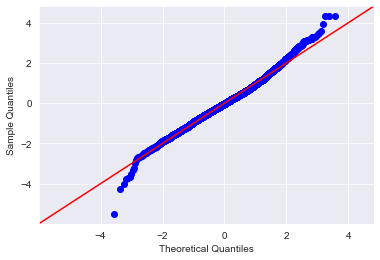

In [179]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


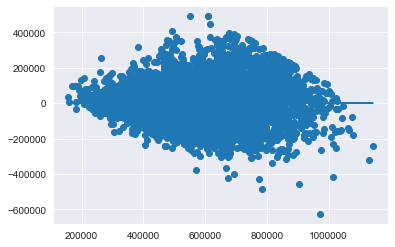

In [180]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

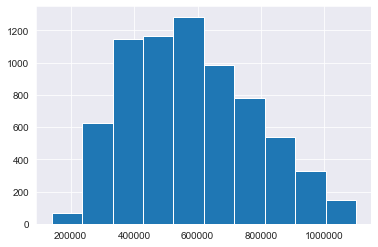

In [181]:
df.price.hist()

In [182]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 760000.0
0.81 percentile: 769000.0
0.82 percentile: 779665.0
0.83 percentile: 787222.0
0.84 percentile: 799000.0
0.85 percentile: 805000.0
0.86 percentile: 815000.0
0.87 percentile: 825000.0
0.88 percentile: 839000.0
0.89 percentile: 850000.0
0.9 percentile: 860000.0
0.91 percentile: 872562.5
0.92 percentile: 889000.0
0.93 percentile: 900000.0
0.94 percentile: 920500.0
0.95 percentile: 940000.0
0.96 percentile: 963990.0
0.97 percentile: 985750.0
0.98 percentile: 1010000.0
0.99 percentile: 1052500.0


In [184]:
orig_tot = len(df)
df = df[df.price < 1000000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
train, test = train_test_split(df)

Percent removed: 0.023742227247032222


In [185]:
X = train[x_cols]
y = train['price']

In [186]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     1734.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:33:26   Log-Likelihood:                -67423.
No. Observations:                5181   AIC:                         1.349e+05
Df Residuals:                    5174   BIC:                         1.349e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sqft_living           8.581e+04   2067.452     41.505      0.000    8.18e+04    8.99e+04
sqft_lot              1.678e+04   1801.108      9.317      0.000    1.33e+04    2.03e+04
distance_from_a_city -1.229e+05   1648.962    -74.533      0.000   -1.26e+05    -1.2e+05
grade8                 5.59e+05   1996.738    279.942      0.000    5.55e+05    5.63e+05
grade9                6.322e+05   3219.337    196.370      0.000    6.26e+05    6.38e+05
grade10               6.844e+05   5977.731    114.490      0.000    6.73e+05    6.96e+05
grade11               7.431e+05   1.72e+04     43.217      0.000    7.09e+05    7.77e+05
==============================================================================
Omnibus:                       66.379   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.959
Skew:                           0.073   Prob(JB):                     2.96e-25
Kurtosis:                       3.708   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

7 7
['sqft_living', 'sqft_lot', 'distance_from_a_city', 'grade8', 'grade9']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
sqft_living,8.581e+04,2067.452,41.505,0.0,8.18e+04,8.99e+04
sqft_lot,1.678e+04,1801.108,9.317,0.0,1.33e+04,2.03e+04
distance_from_a_city,-1.229e+05,1648.962,-74.533,0.0,-1.26e+05,-1.2e+05
grade8,5.59e+05,1996.738,279.942,0.0,5.55e+05,5.63e+05
grade9,6.322e+05,3219.337,196.370,0.0,6.26e+05,6.38e+05


In [188]:
X = train[x_cols]
y= train['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     1734.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:33:30   Log-Likelihood:                -67423.
No. Observations:                5181   AIC:                         1.349e+05
Df Residuals:                    5174   BIC:                         1.349e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sqft_living           8.581e+04   2067.452     41.505      0.000    8.18e+04    8.99e+04
sqft_lot              1.678e+04   1801.108      9.317      0.000    1.33e+04    2.03e+04
distance_from_a_city -1.229e+05   1648.962    -74.533      0.000   -1.26e+05    -1.2e+05
grade8                 5.59e+05   1996.738    279.942      0.000    5.55e+05    5.63e+05
grade9                6.322e+05   3219.337    196.370      0.000    6.26e+05    6.38e+05
grade10               6.844e+05   5977.731    114.490      0.000    6.73e+05    6.96e+05
grade11               7.431e+05   1.72e+04     43.217      0.000    7.09e+05    7.77e+05
==============================================================================
Omnibus:                       66.379   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.959
Skew:                           0.073   Prob(JB):                     2.96e-25
Kurtosis:                       3.708   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = train[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('sqft_living', 1.7757196145336014),
 ('sqft_lot', 1.463205956723765),
 ('distance_from_a_city', 1.1414105166429005),
 ('grade8', 1.194636047924547),
 ('grade9', 1.0864288901335006),
 ('grade10', 1.1243369968201558),
 ('grade11', 1.0279270369184441)]

In [190]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

7 7


In [191]:
X = train[x_cols]
y= train['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     1734.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:33:33   Log-Likelihood:                -67423.
No. Observations:                5181   AIC:                         1.349e+05
Df Residuals:                    5174   BIC:                         1.349e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sqft_living           8.581e+04   2067.452     41.505      0.000    8.18e+04    8.99e+04
sqft_lot              1.678e+04   1801.108      9.317      0.000    1.33e+04    2.03e+04
distance_from_a_city -1.229e+05   1648.962    -74.533      0.000   -1.26e+05    -1.2e+05
grade8                 5.59e+05   1996.738    279.942      0.000    5.55e+05    5.63e+05
grade9                6.322e+05   3219.337    196.370      0.000    6.26e+05    6.38e+05
grade10               6.844e+05   5977.731    114.490      0.000    6.73e+05    6.96e+05
grade11               7.431e+05   1.72e+04     43.217      0.000    7.09e+05    7.77e+05
==============================================================================
Omnibus:                       66.379   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.959
Skew:                           0.073   Prob(JB):                     2.96e-25
Kurtosis:                       3.708   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

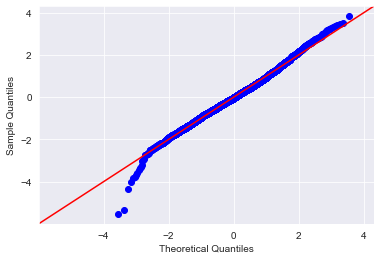

In [192]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


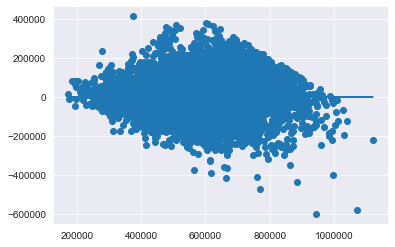

In [193]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 745000.0
0.81 percentile: 750000.0
0.82 percentile: 760000.0
0.83 percentile: 769728.9999999995
0.84 percentile: 779881.6000000001
0.85 percentile: 785974.9999999999
0.86 percentile: 798504.9999999999
0.87 percentile: 804995.45
0.88 percentile: 815000.0
0.89 percentile: 825000.0
0.9 percentile: 835030.0
0.91 percentile: 849000.0
0.92 percentile: 855534.6400000004
0.93 percentile: 870000.0
0.94 percentile: 882995.8
0.95 percentile: 900000.0
0.96 percentile: 915000.0
0.97 percentile: 935000.0
0.98 percentile: 955000.0
0.99 percentile: 978465.0000000001


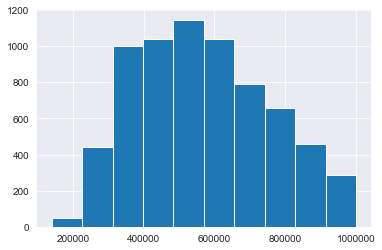

In [194]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [195]:
df = df[df.price <= 9700000.0]
train, test = train_test_split(df)

In [196]:
X = train[x_cols]
y= train['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     1730.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:33:47   Log-Likelihood:                -67382.
No. Observations:                5181   AIC:                         1.348e+05
Df Residuals:                    5174   BIC:                         1.348e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sqft_living           8.485e+04   2058.896     41.210      0.000    8.08e+04    8.89e+04
sqft_lot              1.689e+04   1785.041      9.462      0.000    1.34e+04    2.04e+04
distance_from_a_city -1.225e+05   1632.687    -75.018      0.000   -1.26e+05   -1.19e+05
grade8                5.579e+05   1975.743    282.395      0.000    5.54e+05    5.62e+05
grade9                6.338e+05   3186.834    198.871      0.000    6.28e+05     6.4e+05
grade10               6.826e+05   6101.927    111.869      0.000    6.71e+05    6.95e+05
grade11               7.538e+05   1.84e+04     40.915      0.000    7.18e+05     7.9e+05
==============================================================================
Omnibus:                       72.050   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.112
Skew:                           0.080   Prob(JB):                     6.80e-28
Kurtosis:                       3.744   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

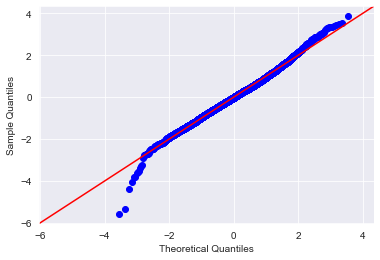

In [197]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


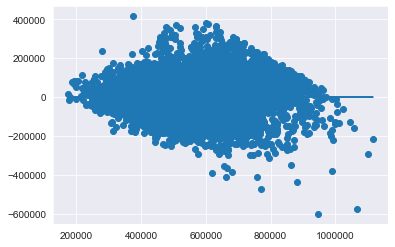

In [198]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [199]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [200]:
residuals = model.resid

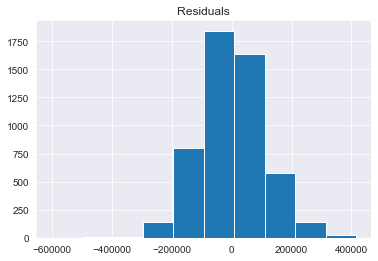

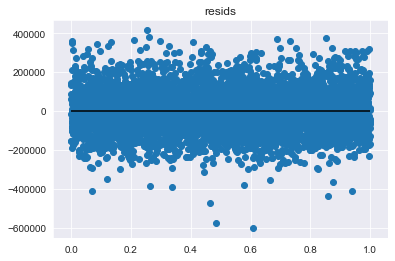

In [201]:
plot_residuals(residuals)

In [202]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [203]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [204]:
X_train = train[x_cols]
X_test = test[x_cols]

In [205]:
y_train = train['price']
y_test = test['price']

In [206]:
ols.fit(train[x_cols], train['price'])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=False)

In [207]:
y_train_preds = ols.predict(train[x_cols])
y_train_preds

array([610376.37444635, 552248.77748559, 851726.15737575, ...,
       998091.39838607, 272953.0078346 , 693639.56811664])

In [208]:
r2_score(train['price'], y_train_preds)

0.6673069465003244

In [209]:
# r2 
training_score = ols.score(X_train, y_train)
# ols.score is calculating the y_train_preds and then using those to get the r2 score
training_score

0.6673069465003244

In [210]:
testing_score = ols.score(X_test, y_test)
testing_score

0.6619115456243607

In [211]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(0.6664474371643827, 0.6658608591564106, 0.6650405649040814)

In [212]:
cv5mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) )
cv10mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=10, n_jobs=-1) )
cv20mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mse_scores,cv10mse_scores,cv20mse_scores

(-11614094597.815866, -11621422734.799458, -11624945604.40733)

In [213]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-83966.75680009706, -83995.14203404232, -84000.61994108271)

In [214]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmse_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
    cvmse_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmse_5}")
    print(f"cv10  MSE score = {cvmse_10}")

    return ols

In [215]:
make_ols_sklearn(X, y)

train R2 score = 0.6661228960456327
test R2 score = 0.67132624523968
cv5 R2 score = 0.6664474371643827
cv10 R2 score = 0.6658608591564106
cv5 MSE score = -11614094597.815866
cv10  MSE score = -11621422734.799454


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [217]:
make_ols_sklearn(X, y)

train R2 score = 0.6700536151862291
test R2 score = 0.6559675729697316
cv5 R2 score = 0.6664474371643827
cv10 R2 score = 0.6658608591564106
cv5 MSE score = -11614094597.815866
cv10  MSE score = -11621422734.799454


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)